In [3]:
import numpy as np
import pandas as pd
import pickle
print('包导入完毕')

包导入完毕


In [2]:
# 全部的30个数据包，如果用的到的话
import os
import numpy as np
import pandas as pd

# 由reader迭代器进行和并，得到大文件的dataframe
def getDataframe(reader):
    chunks = []
    while 1:
        try:
            chunk = reader.get_chunk(100000)
            chunks.append(chunk)
        except StopIteration:
            print('Iteration is stoped')
            break
    df = pd.concat(chunks,ignore_index=True) # 合并全部的chunk
    print('合并完成！')
    return df

# 整和所有的df
def concat_alldf():
    df_lst = []
    files = os.listdir('ANN/20003-2017-03')
    files.sort()
    for csv in files:
        if csv == '.DS_Store':
            continue
    #     print(csv)
        # 利用迭代器读取大文件
        reader = pd.read_csv('ANN/20003-2017-03/'+csv,iterator=True)
        df = getDataframe(reader)
        df_lst.append(df)
    df_all = pd.concat(df_lst,axis = 0,ignore_index = True)
    return df_all



df_all = concat_alldf()



KeyboardInterrupt: 

In [4]:
# 先使用第一个csv进行测试
reader = pd.read_csv('ANN/20003-2017-03/20003001#2017-03.csv',iterator=True)
chunks = []
while 1:
    try:
        chunk = reader.get_chunk(100000)
        chunks.append(chunk)
    except StopIteration:
        print('Iteration is stoped')
        break
df = pd.concat(chunks,ignore_index=True) # 合并全部的chunk
print('合并完成！')

Iteration is stoped
合并完成！


In [5]:

# 去除空属性
df = df.dropna(axis = 1,how = 'all')
# print(df.describe())
# 去除全部相同的属性
df = df.ix[:,(df != df.ix[0]).any()]
# df = df.drop(['Unnamed: 0','rectime'],axis = 1)
print('执行完毕')

/Users/zhangkai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


执行完毕


In [4]:
print(df.columns)
print(df.shape)
print(df['WT_Faultcode'].unique())
print(df['WT_Faultcode'].value_counts())
print(df.describe())
print('执行完毕')

Index(['rectime', 'iActivePoweiSetPointValue', 'iAvailabillityToday',
       'iAvailabillityTotal', 'iBlade1TempBattBox_1sec',
       'iBlade1TempInvBox_1sec', 'iBlade1TempMotor_1sec',
       'iBlade1TempPMCHeatsink_1sec', 'iBlade1TempPMMHeatsink_1sec',
       'iBlade2TempBattBox_1sec',
       ...
       'SCW036', 'SCW038', 'SCW041', 'SCW042', 'WT_Faultcode', 'WT_Runcode',
       'iWindSpeed1', 'iWindSpeed2', 'iVaneDirection1', 'iVaneDirection2'],
      dtype='object', length=106)
(2337281, 106)
[  0 657 287 886  53   9   2   3 613 884  45  93]
0      1720488
657     508334
9        49113
3        34984
2         7869
287       7716
884       7156
886       1566
53          26
45          17
93           8
613          4
Name: WT_Faultcode, dtype: int64
       iActivePoweiSetPointValue  iAvailabillityToday  iAvailabillityTotal  \
count               2.337281e+06         2.337281e+06         2.337281e+06   
mean                5.772370e+02         9.924260e+01         9.604515e+01   
st

In [5]:
print(df.columns.values)

['rectime' 'iActivePoweiSetPointValue' 'iAvailabillityToday'
 'iAvailabillityTotal' 'iBlade1TempBattBox_1sec' 'iBlade1TempInvBox_1sec'
 'iBlade1TempMotor_1sec' 'iBlade1TempPMCHeatsink_1sec'
 'iBlade1TempPMMHeatsink_1sec' 'iBlade2TempBattBox_1sec'
 'iBlade2TempInvBox_1sec' 'iBlade2TempMotor_1sec'
 'iBlade2TempPMCHeatsink_2sec' 'iBlade2TempPMMHeatsink_2sec'
 'iBlade3TempBattBox_1sec' 'iBlade3TempInvBox_1sec'
 'iBlade3TempMotor_1sec' 'iBlade3TempPMCHeatsink_3sec'
 'iBlade3TempPMMHeatsink_3sec' 'iBPLevel' 'iCableTwistTotal' 'iCosPhi'
 'iCosPhiSetValue' 'iFiequency' 'iGenPower' 'iGenSpeed' 'iIL1_690V'
 'iIL2_690V' 'iIL3_690V' 'iKWhOverall_h' 'iKWhThisDay_h'
 'iNacellePositionLtd' 'iNacellePositionTotal' 'iOperationHoursDay'
 'iOperationHoursOverall_h' 'iPitchAngle1' 'iPitchAngle2' 'iPitchAngle3'
 'iReactivePower' 'iSetValueGenSpeed' 'iSetValuePitchAngle'
 'iTemp1GearOil_1sec' 'iTempCabinetNacelle_1sec'
 'iTempCabinetTowerBase_1sec' 'iTempCntr_1sec' 'iTempGearBearDE_1sec'
 'iTempGearBearNDE_

In [6]:
df['rectime']

0          2017-03-04 15:38:10
1          2017-03-04 15:38:11
2          2017-03-04 15:38:12
3          2017-03-04 15:38:13
4          2017-03-04 15:38:14
5          2017-03-04 15:38:15
6          2017-03-04 15:38:16
7          2017-03-04 15:38:17
8          2017-03-04 15:38:18
9          2017-03-04 15:38:19
10         2017-03-04 15:38:20
11         2017-03-04 15:38:21
12         2017-03-04 15:38:22
13         2017-03-04 15:38:23
14         2017-03-04 15:38:24
15         2017-03-04 15:38:25
16         2017-03-04 15:38:26
17         2017-03-04 15:38:27
18         2017-03-04 15:38:28
19         2017-03-04 15:38:29
20         2017-03-04 15:38:30
21         2017-03-04 15:38:31
22         2017-03-04 15:38:32
23         2017-03-04 15:38:33
24         2017-03-04 15:38:34
25         2017-03-04 15:38:35
26         2017-03-04 15:38:36
27         2017-03-04 15:38:37
28         2017-03-04 15:38:38
29         2017-03-04 15:38:39
                  ...         
2337251    2017-03-31 23:59:29
2337252 

In [6]:
# 有的值部分为空，用0替换
# print(df['iVaneDirection1'].unique())
# print(df['iWindSpeed1'].unique())
df = df.fillna(value = 0.)
# print(df['iWindSpeed1'].unique())
df.isnull().any()

rectime                        False
iActivePoweiSetPointValue      False
iAvailabillityToday            False
iAvailabillityTotal            False
iBlade1TempBattBox_1sec        False
iBlade1TempInvBox_1sec         False
iBlade1TempMotor_1sec          False
iBlade1TempPMCHeatsink_1sec    False
iBlade1TempPMMHeatsink_1sec    False
iBlade2TempBattBox_1sec        False
iBlade2TempInvBox_1sec         False
iBlade2TempMotor_1sec          False
iBlade2TempPMCHeatsink_2sec    False
iBlade2TempPMMHeatsink_2sec    False
iBlade3TempBattBox_1sec        False
iBlade3TempInvBox_1sec         False
iBlade3TempMotor_1sec          False
iBlade3TempPMCHeatsink_3sec    False
iBlade3TempPMMHeatsink_3sec    False
iBPLevel                       False
iCableTwistTotal               False
iCosPhi                        False
iCosPhiSetValue                False
iFiequency                     False
iGenPower                      False
iGenSpeed                      False
iIL1_690V                      False
i

In [7]:
# 去除标签,修正标签，故障为1，无故障为0
# 开始修正参数
new_value = []
for value in df['WT_Faultcode'].values:
    if value != 0:
        value = 1
    new_value.append(value)
df['WT_Faultcode'] = np.array(new_value)
print(df['WT_Faultcode'].shape)
print(df['WT_Faultcode'].unique())

# 减去了时间属性
df = df.drop(['rectime'],axis = 1)
label = df['WT_Faultcode']
with open('label.pickle','wb') as file:
    pickle.dump(label,file)
print(df['WT_Faultcode'].shape)
df = df.drop(['WT_Faultcode'],axis = 1)

(2337281,)
[0 1]
(2337281,)


In [9]:
# 筛选属性，剔除值过少的属性
print(df.shape)
for column in df.columns:
    if len(df[column].unique()) <= 100:
        df = df.drop([column],axis = 1)
print(df.shape)


(2337281, 104)
(2337281, 64)


In [10]:
df = df.fillna(value = 0.)
df

,iActivePoweiSetPointValue,iAvailabillityToday,iBlade1TempBattBox_1sec,iBlade1TempInvBox_1sec,iBlade1TempMotor_1sec,iBlade1TempPMCHeatsink_1sec,iBlade1TempPMMHeatsink_1sec,iBlade2TempBattBox_1sec,iBlade2TempInvBox_1sec,iBlade2TempMotor_1sec,...,iUL1_690V,iUL2_690V,iUL3_690V,iVaneDiiection,iVibrationY,iVibrationZ,iwindDirection,iWindSpeed,iWindSpeed1,iWindSpeed2
0,187,99.99,21.2,21.8,33.9,33.3,26.2,21.0,23.0,35.9,...,698.8,700.6,703.3,3.42,-0.043,0.000,151.88,4.22,0.00,0.00
1,186,99.99,21.2,21.8,33.9,33.3,26.2,21.0,23.0,35.9,...,699.4,701.2,703.8,4.51,0.032,-0.022,152.97,4.11,0.00,0.00
2,186,99.99,21.2,21.8,33.9,33.3,26.2,21.0,23.0,35.9,...,699.4,701.2,703.8,4.51,0.032,-0.022,152.97,4.11,0.00,0.00
3,184,99.99,21.2,21.8,33.9,33.3,26.2,21.0,23.0,35.9,...,699.7,701.5,704.1,4.84,-0.054,-0.033,153.30,4.11,0.00,0.00
4,182,99.99,21.2,21.8,33.9,33.3,26.2,21.0,23.0,35.9,...,700.5,702.0,704.6,4.56,-0.022,0.011,153.02,4.11,0.00,0.00
5,182,99.99,21.2,21.8,33.9,33.3,26.2,21.0,23.0,35.9,...,700.7,702.6,705.5,5.16,-0.022,-0.033,153.62,4.16,0.00,0.00
6,182,99.99,21.2,21.8,33.9,33.3,26.2,21.0,23.0,35.9,...,700.7,702.6,705.5,5.16,-0.022,-0.033,153.62,4.16,0.00,0.00
7,183,99.99,21.2,21.8,33.9,33.3,26.2,21.0,23.0,35.9,...,701.3,702.8,705.6,5.24,-0.054,0.000,153.70,4.12,0.00,0.00
8,184,99.99,21.2,21.8,33.9,33.3,26.2,21.0,23.0,35.9,...,700.3,702.1,704.7,4.75,0.054,-0.033,153.21,4.11,0.00,0.00
9,185,99.99,21.2,21.8,33.9,33.3,26.2,21.0,23.0,36.0,...,700.1,701.8,704.5,3.89,-0.054,0.000,152.35,4.16,0.00,0.00


In [11]:
# minmax归一化,最后一步执行，可以输入神经网络了
for column in df.columns:
    df[column] = (df[column]-df[column].min())/(df[column].max()-df[column].min())
df

,iActivePoweiSetPointValue,iAvailabillityToday,iBlade1TempBattBox_1sec,iBlade1TempInvBox_1sec,iBlade1TempMotor_1sec,iBlade1TempPMCHeatsink_1sec,iBlade1TempPMMHeatsink_1sec,iBlade2TempBattBox_1sec,iBlade2TempInvBox_1sec,iBlade2TempMotor_1sec,...,iUL1_690V,iUL2_690V,iUL3_690V,iVaneDiiection,iVibrationY,iVibrationZ,iwindDirection,iWindSpeed,iWindSpeed1,iWindSpeed2
0,0.089048,0.9999,0.662500,0.608939,0.591623,0.615527,0.677003,0.646154,0.642458,0.675258,...,0.965193,0.961702,0.962238,0.509486,0.428339,0.503130,0.731762,0.243790,0.000000,0.000000
1,0.088571,0.9999,0.662500,0.608939,0.591623,0.615527,0.677003,0.646154,0.642458,0.675258,...,0.966022,0.962526,0.962922,0.512514,0.469055,0.490609,0.733425,0.237435,0.000000,0.000000
2,0.088571,0.9999,0.662500,0.608939,0.591623,0.615527,0.677003,0.646154,0.642458,0.675258,...,0.966022,0.962526,0.962922,0.512514,0.469055,0.490609,0.733425,0.237435,0.000000,0.000000
3,0.087619,0.9999,0.662500,0.608939,0.591623,0.615527,0.677003,0.646154,0.642458,0.675258,...,0.966436,0.962938,0.963333,0.513431,0.422367,0.484348,0.733928,0.237435,0.000000,0.000000
4,0.086667,0.9999,0.662500,0.608939,0.591623,0.615527,0.677003,0.646154,0.642458,0.675258,...,0.967541,0.963624,0.964017,0.512653,0.439739,0.509391,0.733501,0.237435,0.000000,0.000000
5,0.086667,0.9999,0.662500,0.608939,0.591623,0.615527,0.677003,0.646154,0.642458,0.675258,...,0.967818,0.964447,0.965248,0.514320,0.439739,0.484348,0.734417,0.240324,0.000000,0.000000
6,0.086667,0.9999,0.662500,0.608939,0.591623,0.615527,0.677003,0.646154,0.642458,0.675258,...,0.967818,0.964447,0.965248,0.514320,0.439739,0.484348,0.734417,0.240324,0.000000,0.000000
7,0.087143,0.9999,0.662500,0.608939,0.591623,0.615527,0.677003,0.646154,0.642458,0.675258,...,0.968646,0.964722,0.965385,0.514542,0.422367,0.503130,0.734539,0.238013,0.000000,0.000000
8,0.087619,0.9999,0.662500,0.608939,0.591623,0.615527,0.677003,0.646154,0.642458,0.675258,...,0.967265,0.963761,0.964154,0.513181,0.480999,0.484348,0.733791,0.237435,0.000000,0.000000
9,0.088095,0.9999,0.662500,0.608939,0.591623,0.615527,0.677003,0.646154,0.642458,0.676976,...,0.966989,0.963349,0.963880,0.510792,0.422367,0.503130,0.732479,0.240324,0.000000,0.000000


In [49]:
import pickle

with open('df.pickle','wb') as file:
    pickle.dump(df,file)
    


In [12]:
print(df['iAvailabillityToday'].unique())

[0.9999 0.     1.     0.9998 0.9997 0.9996 0.9995 0.9994 0.9993 0.9992
 0.9991 0.999  0.9989 0.9988 0.998  0.9983 0.9984 0.9985 0.9987 0.9982
 0.9986 0.9962 0.9942 0.9922 0.9868 0.9771 0.9676 0.9583 0.9492 0.9402
 0.9314 0.9237 0.9226 0.9221 0.9228 0.9235 0.9242 0.9249 0.9255 0.9262
 0.9268 0.9274 0.928  0.9286 0.9292 0.9298 0.9304 0.9309 0.9315 0.932
 0.9326 0.9331 0.9336 0.9341 0.9346 0.9351 0.9356 0.9361 0.9365 0.937
 0.9375 0.9379 0.9383 0.9388 0.9392 0.9396 0.94   0.9404 0.9981 0.994
 0.9841 0.9744 0.9731 0.9733 0.9736 0.9737 0.9738 0.974  0.9743 0.9745
 0.9747 0.9748 0.9749 0.9751 0.9752 0.9753 0.9756 0.9758 0.9759 0.976
 0.9762 0.9763 0.9764 0.9766 0.9767 0.9768 0.9769 0.977  0.9772 0.9773
 0.9774 0.9776 0.9777 0.9778 0.9779 0.978  0.9781 0.9783 0.9784 0.9785
 0.9786 0.9787 0.9788 0.9789 0.9791 0.9792 0.9793 0.9794 0.9795 0.9796
 0.9797 0.9798 0.9799 0.98   0.9801 0.9802 0.9803 0.9804 0.9805 0.9806
 0.9807 0.9809 0.9977 0.9978 0.9979 0.9959 0.9941 0.9923 0.9911 0.9912
 0.9913 0.

In [45]:
print(label.shape)
print(df.shape)

(2337281,)
(2337281, 64)


In [50]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

with open('df.pickle', 'rb') as file:
    df =pickle.load(file)
print(df.head())
X_train, X_test, Y_train, Y_test = train_test_split(df, label, test_size=0.2, random_state=0)

# 训练模型
# objective='multi:softmax'
# model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=160, silent=True, objective='binary:logistic')
print(X_train.shape,Y_train.shape)


   iActivePoweiSetPointValue  iAvailabillityToday  iBlade1TempBattBox_1sec  \
0                   0.089048               0.9999                   0.6625   
1                   0.088571               0.9999                   0.6625   
2                   0.088571               0.9999                   0.6625   
3                   0.087619               0.9999                   0.6625   
4                   0.086667               0.9999                   0.6625   

   iBlade1TempInvBox_1sec  iBlade1TempMotor_1sec  iBlade1TempPMCHeatsink_1sec  \
0                0.608939               0.591623                     0.615527   
1                0.608939               0.591623                     0.615527   
2                0.608939               0.591623                     0.615527   
3                0.608939               0.591623                     0.615527   
4                0.608939               0.591623                     0.615527   

   iBlade1TempPMMHeatsink_1sec  iBlade2TempB

In [57]:
print(X_train.head())
print(Y_train.head())

         iActivePoweiSetPointValue  iAvailabillityToday  \
453062                    0.496667               0.9336   
606682                    0.000000               0.9990   
682670                    0.486190               0.9999   
1571225                   1.000000               1.0000   
2256949                   1.000000               1.0000   

         iBlade1TempBattBox_1sec  iBlade1TempInvBox_1sec  \
453062                  0.550000                0.606145   
606682                  0.487500                0.522346   
682670                  0.728125                0.756983   
1571225                 0.803125                0.821229   
2256949                 0.831250                0.796089   

         iBlade1TempMotor_1sec  iBlade1TempPMCHeatsink_1sec  \
453062                0.684119                     0.696858   
606682                0.212914                     0.273567   
682670                0.815009                     0.820702   
1571225               0.858639  

In [52]:
# XGBoost的原生接口

# 参数调整
params = {
    'booster': 'gbtree',
#     'objective': 'multi:softmax',
#     'num_class': 2,
    'objective': 'binary:logistic',
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

plst = params.items()


dtrain = xgb.DMatrix(X_train, Y_train)
num_rounds = 100
model = xgb.train(plst, dtrain, num_rounds)

# XGBoost的sklearn接口

# 训练模型
# model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=160, silent=True, objective='binary:logistic')
# model.fit(X_train, Y_train)
print('训练结束')

训练结束


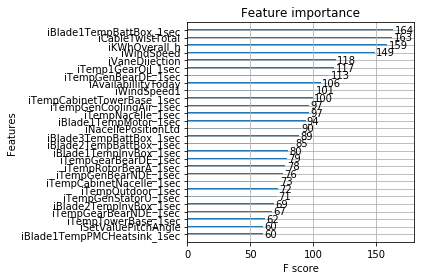

In [62]:
import pickle

with open('model.pickle','wb') as file:
    pickle.dump(model,file)
ax = plt.figure(figsize = (20,20))
plot_importance(model,max_num_features=28)
plt.tight_layout()
plt.show()

In [63]:
# 挑选出
import operator
importance = model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
print(importance)
filter_importance = [x for x,y in importance if y >=60]
print(len(filter_importance),filter_importance)
df_final = df[filter_importance]
df_final.shape

# print(model.feature_importances_)

[('iBlade1TempBattBox_1sec', 164), ('iCableTwistTotal', 163), ('iKWhOverall_h', 159), ('iWindSpeed', 149), ('iVaneDiiection', 118), ('iTemp1GearOil_1sec', 117), ('iTempGenBearDE_1sec', 113), ('iAvailabillityToday', 106), ('iWindSpeed1', 101), ('iTempCabinetTowerBase_1sec', 100), ('iTempNacelle_1sec', 97), ('iTempGenCoolingAir_1sec', 97), ('iBlade1TempMotor_1sec', 94), ('iNacellePositionLtd', 90), ('iBlade3TempBattBox_1sec', 89), ('iBlade2TempBattBox_1sec', 85), ('iBlade1TempInvBox_1sec', 80), ('iTempGearBearDE_1sec', 79), ('iTempRotorBearA_1sec', 78), ('iTempGenBearNDE_1sec', 76), ('iTempCabinetNacelle_1sec', 73), ('iTempOutdoor_1sec', 72), ('iTempGenStatorU_1sec', 71), ('iBlade2TempInvBox_1sec', 69), ('iTempGearBearNDE_1sec', 67), ('iTempTowerBase_1sec', 62), ('iBlade1TempPMCHeatsink_1sec', 60), ('iSetValuePitchAngle', 60), ('iBlade3TempMotor_1sec', 55), ('iBlade3TempInvBox_1sec', 55), ('iTempRotorBearB_1sec', 53), ('iGenSpeed', 51), ('iBlade3TempPMCHeatsink_3sec', 49), ('iBlade2TempP

(2337281, 28)

In [64]:
import pickle

with open('df_final.pickle','wb') as file:
    pickle.dump(df_final,file)